In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [70]:
digits.data.shape

(1797, 64)

In [72]:
digits.target.shape

(1797,)

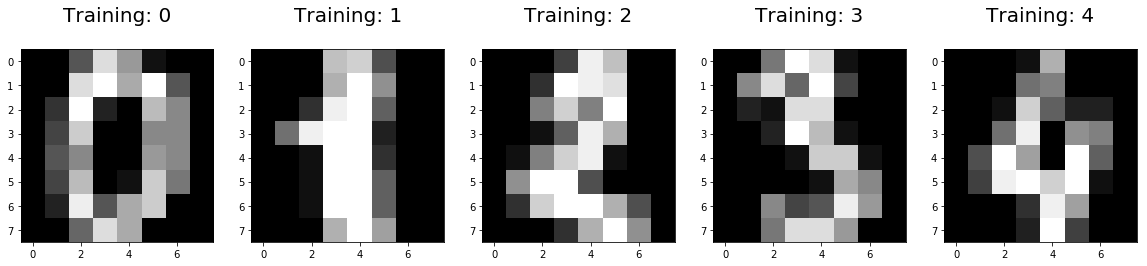

In [81]:
#displaying some images and labels
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
    plt.title('Training: %i\n'%label,fontsize=20)

In [111]:
Xtrain,Xtest,ytrain,ytest = train_test_split(digits.data, digits.target, test_size=.2, random_state=345)

In [112]:
Xtrain.shape

(1437, 64)

In [113]:
ytrain.shape

(1437,)

In [94]:
LogisticRegression?

In [124]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='auto',solver='newton-cg',)
log_reg.fit(Xtrain, ytrain)

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
predictions = log_reg.predict(Xtest)
cm = metrics.confusion_matrix(ytest, predictions)
print(cm)

[[39  0  0  0  0  1  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  2  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  2  0  0 29  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 29  0  0]
 [ 0  1  0  1  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0  0  1 41]]


In [273]:
score = log_reg.score(Xtest,ytest)
print('score = {}%'.format(score*100))

score = 97.5%


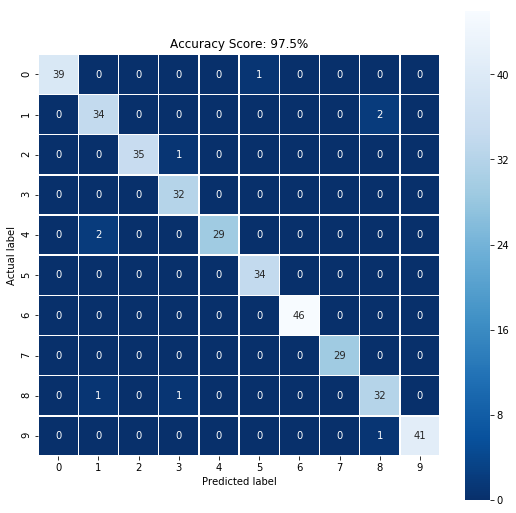

In [274]:
#representing confusion matrix on a heatmap
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,linewidths=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}%'.format(score*100));

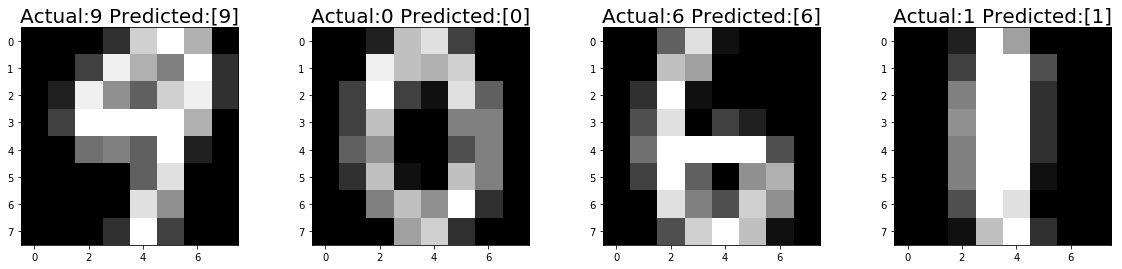

In [276]:
#Check Predictions
plt.figure(figsize=(20,4))
index = 0
for image,label in zip(Xtest[0:4],ytest[0:4]):    
    plt.subplot(1,4,index+1)
    index+=1
    plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
    plt.title('Actual:{} Predicted:{}'.format(label,log_reg.predict(image.reshape(1,-1))),fontsize=20)

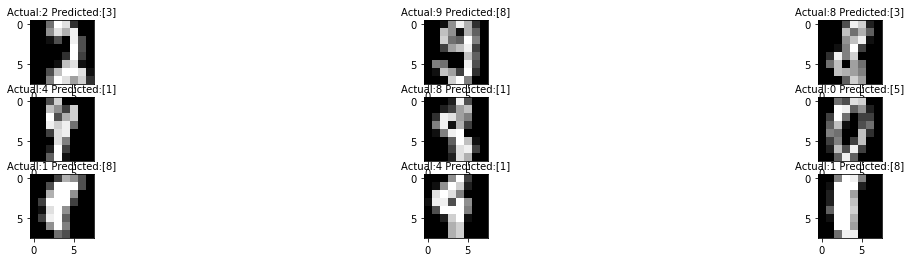

In [279]:
#False Predictions
plt.figure(figsize=(20,4))
index = 0
for image,label in zip(Xtest,ytest):    
    if label != log_reg.predict(image.reshape(1,-1)):
        plt.subplot(3,3,index+1)
        index+=1
        plt.imshow(np.reshape(image,(8,8)),cmap = plt.cm.gray)
        plt.title('Actual:{} Predicted:{}'.format(label,log_reg.predict(image.reshape(1,-1))),fontsize=10)